# Chemical Segregation(Classification)
A chemist has two chemical flasks labelled 1 and 0 which contains two different chemicals. He extracted 3 features from these chemicals in order to distinguish between them. You are provided with the results derived by the chemist and your task is to create a model that will label chemical 0 or 1 given its three features.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
x = pd.read_csv("../Datasets/Logistic Regression/Logistic_X_Train.csv").values
y = pd.read_csv("../Datasets/Logistic Regression/Logistic_Y_Train.csv").values
print(x.shape, y.shape)

(3000, 3) (3000, 1)


In [23]:
ones = np.ones((x.shape[0],1))
print(ones.shape)

(3000, 1)


In [24]:
x = np.hstack((x,ones))
print(x.shape)
print(x[:2,])

(3000, 4)
[[-1.23937466  0.74910149 -0.52851491  1.        ]
 [-1.03607028  0.80143631 -1.28371152  1.        ]]


In [91]:
def hypothesis(x,w):
    return sigmoid(np.dot(x,w))

def sigmoid(z):
    return 1/(1+np.exp(-z))

def error(x,w,y):
    ml = 0
    for i in range(x.shape[0]):
        hx = hypothesis(x[i],w)
        ml += y[i]*np.log2(hx) + (1-y[i])*np.log2(1-hx)
    err = -ml/x.shape[0]
    return err

def getGrads(x,y,w):
    grads = np.zeros(w.shape)
    for i in range(x.shape[0]):
        grads += (y[i] - hypothesis(x[i],w))*x[i]
    grads /= x.shape[0]
    return grads

def gradientDescent(x,y,learningRate=0.5, maxItr=100):
    w = np.zeros((x.shape[1],))
    errList = []
    for i in range(maxItr):
        err = error(x,w,y)
        errList.append(err)
        grads = getGrads(x,y,w)
        w += learningRate*grads
    return w,errList

        

In [92]:
w,errList = gradientDescent(x,y)

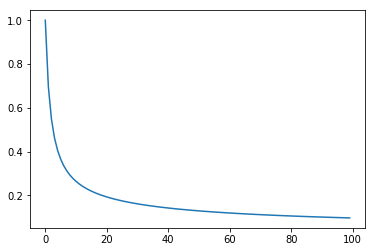

In [93]:
plt.plot(errList)
plt.show()

In [94]:
def predict(x,w):
    confidence = hypothesis(x,w)
    if(confidence<0.5):
        return 0
    else:
        return 1

In [95]:
xTest = pd.read_csv("../Datasets/Logistic Regression/Logistic_X_Test.csv").values
onesTest = np.ones((xTest.shape[0],1))
xTest = np.hstack((xTest,onesTest))
yTest = []
for i in range(xTest.shape[0]):
    yTest.append(predict(xTest[i],w))
yTest = np.array(yTest)
pd.DataFrame(yTest).to_csv("../Datasets/Logistic Regression/Logistic_Y_Test.csv", index= False)
yTestDF = pd.read_csv("../Datasets/Logistic Regression/Logistic_Y_Test.csv")
yTestDF.columns = ["label"]
yTestDF.to_csv("../Datasets/Logistic Regression/Logistic_Y_Test.csv", index= False)
yTestDF = pd.read_csv("../Datasets/Logistic Regression/Logistic_Y_Test.csv")
yTestDF.head()

,label
0,1
1,1
2,0
3,1
4,1


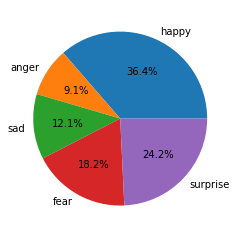

In [99]:
a = [12,3,4,6,8]
x = ["happy", "anger", "sad", "fear", "surprise"]
plt.pie(a, labels=x, autopct='%.1f%%')
plt.show()data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAO8AAADuCAYAAADRLFAcAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4zLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvnQurowAAIABJREFUeJztnXl8VNXZx7/PLNlJ2HdwAIEEiIogm7IYd6PVuqK2YrVSNWrr2rRva+Meq+2rxZdGrVZc6lJFraaKVmVRirIJQScIYpDVsIXsy8w97x93giyBbDNz752c7+czH5I75977uxl+c8499zzPI0opNBqN83BZLUCj0bQNbV6NxqFo82o0DkWbV6NxKNq8Go1D0ebVaByKNq9G41C0eTUah6LNq9E4FG1ejcahaPNqNA5Fm1ejcSjavBqNQ9Hm1WgcijavRuNQtHk1GoeizavROBRtXo3GoWjzajQORZtXo3Eo2rwajUPR5tVoHIo2r0bjULR5NRqHos2r0TgUbV6NxqFo82osR0R8IrLGah1OQ5tXo3Eo2rwau+AWkadE5EsReV9EEkXkWhFZKiKrROR1EUkCEJFnRaRARJaJyNcick5o+1Ui8paIzBeRdSLyh9D2e0TkV40nEpH7ReSX1lxm+NDm1diFocD/KaVGAmXAhcBcpdQJSqljAT9wzX7tfcA4IBsoEJGE0PZxoX2PAS4WkbHAM8CVACLiAqYDL0T8iiKMx2oBmvbhyy1MALoBXfd7JQHSRPMGTGPsAnYDu0rys/dGSWpzfKuU+iL083JMc44SkfuAzkAKMG+/9q8qpQxgnYhsANJD2z9QSu0CEJG5wElKqUdFZJeIjAZ6ASsb2zgZbV6b48stdANDgAxgOHA0MBgYBPQBEtt5/ACmmb8B1gPr9n+V5GdXtOf4raBuv5+DmNf1LHC+UmqViFwFTNuvzcGFpVUz2/8GXAX0xuyJHY82r83w5Rb2AyYC44EJwBjaadBm8GD2Rr2ASQe9p3y5heuAJfu9ikryswMR1LM/nYBtIuIFrgC27PfexSIyB/NLbDCwFhgNnCYiXYEa4Hzg6lD7N4B7AC9weXTkRxZtXovx5Rb2AM4CzgZOAvpZq+gABBgWel0Z2lbtyy1chjmELSzJz14VwfP/HvgM2BH6t9N+730HfA6kAtcppWpFhNC214H+wAtKqWUASql6EfkYKFNKBSOoOWqIUgePMjSRxpdbOBpzouUc4AScPXG4Gfg3UAh8WJKfXRXpE4rIs8A7SqnXDtp+FTBWKXVjE/u4gBXAxUqpdZHWGA10zxslfLmFQzDvuX4KHGWtmrDSH5gZetX4cgvfBOYAH5TkZxuWKgshIiOAd4A3YsW4oHveiOLLLUwFLsE07YnWqok6WzAfx8wpyc/2Wy0mFtHmjQC+3MIM4DbMiZFITjY5hSXAY8BrUZzsinm0ecOIL7dwCnAH5v1sU89ZOzqbME38REl+dqXVYpyONm878eUWCnABcCfm6h5N8+wBHgceLcnP3m21GKeizdsOfLmFWcDDwPFWa3EoZUA+8FhJfnat1WKchjZvG/DlFmYCfwTOtFpLjLAJ85nu83aZoXYC2rytwJdb2Ad4AHPBgpOfzdqV1cDtJfnZH1gtxAlo87aA0H3tTOAhIM1iOR2BfwC/LMnP3mm1EDujzdsMvtzCYcBTwBSrtXQwdgK3lORnOz50L1Jo8x4GX26hB3MG+fdAQjPNNZHjPeAXJfnZ31ktxG5o8zaBL7dwMPAKMNZqLRoAKoHrdS98INq8B+HLLbwIM/ZT39vaj2eAG0vys2usFmIHtHlD+HIL44E/AzdYrUVzRNYAl+j10tq8wL5h8j/Riy2cQhXmMPp5q4VYSYc3ry+3cCowFzP3k8ZZPAT8piQ/u0P+J+7QCw1G5r52JfAB2rhO5dfAy6Fbng5HxzVvXtrdi+Nvui2OBr0cz9lcAnzoyy3sZrWQaNPxhs15aR7gCUKJyTYYfRZn1T8yEUSH8DmbdcDZJfnZ660WEi06Vs9rGvcf/JBRkMGubZOe8T680DpRmjAxFFjkyy0cbrWQaNFxzPuDcS8++K0s9xdT7/C8vCj6ojRhpjcwv6MYuGOY9wjGbeQG978mnutavCx6ojQRosMYOPbveVtg3EaUouL8+nu2rVJHD4u8ME2E2Q5MK8nPXmu1kEgR2+bNSxPMDIYtzpAfUK5tU+oeZSvd+0ROmCZKbAMmleRnl1gtJBLE+rD5flpZ2sIjRp//xN9enkxNtGr0aCJHH6DQl1vY2WohkSB2zZuX9nPgN23ZNUnqh38Uf9taN0GdptT5jADm+nILvVYLCTexad68tNOAv7bnEL2kbOzrcXn/DZMijbWcjBkpFlPEnnnz0jKB1whDKZfjXN9MfsjzxPx2a9LYgSt9uYV/sFpEOLGtecWkdfry0tKAtzArx4WFS9wLps5wv6d74Nggz5db+COrRYSLVptXRN4UkeUi8qWIzAxtqxSR+0VklYgsEZFeoe1DQr8Xich9IlK533HuEJGlIrJaRO4ObfOJyFoReQ4zbnNAK+U9g1mvNWyIIHme50ZPdq0uCudxNZbxrC+3MCYKvbWl571aKTUGM0XMzSLSDUgGliiljgUWAteG2j4GPKaUysQsBQmAiJyOuZxtHHAcMEZEGhO8DQVmK6VGKqU2tlhVXtpNmJULwo4ICXO8D/UdIltarkdjV7pgRiI5fgKrLea9WURWYRaPGoBptnrMEooAywFf6OeJmEHuYC6UaOT00GslZs3U9NBxADYqpZa0SlFe2hjgkVbt00pcorq9G/cb1YXymCnPoQL1bHvuFrY+cyNb/3YDZYteNLcrxZ6Fz7HlyZlseeo6ypf967DHMOqq2fx/M9j9wV9Dx2zg+1fvYuvTN1CxonBfu13vzaJuu21iBiZgVmpwNK2a1BGRacCpwESlVLWIzMfMrNigfljtEWzBcQV4UCn1xEHH92FmSWg5eWmpmMni4lq1XxuIk4Bvfvytq0+o+2tyPV7nx5C6vfSa/gCuuERUMMD2F+8kcfAYGnZtIli+g77XFiDiIlhVdthDlC16nvgBo/b9XvPtCuL7jyBt4iVsf+EOOh2fTX3pBpRhEN/76GhcVUu51ZdbuKAkP/vw30w2p7U9bxqwJ2TcdMxvsCOxBLgw9PP0/bbPA64WkRQAEeknIj1bqaWRx4Ahbdy31aRJ9THvxeUuB+cvTRMRXHFmBVJlBMAIgggVX/ybtBMvo3G+0J3c9BqHuu3rCVaVkTho9A/HdLlRDXUQDELoL1S26AU6T/5JZC+mbTztyy3sYbWIttJa874HeETEjznsaG54+yvgVhFZDRwN7AVQSr2POYz+r4gUYT7a6dRKLZCXdiZm4eqoMti1bdLT3kdiIoxQGUG2/v0mNs/6CQm+44jvO5zAnu1U+xexbc6v+P7VP9Cwe8uh+ymDPR/9jS4nX3PA9oRBownsLWXb87eROvZcqtd9RlyvIXg62TJWvjtmtUJHEtG1zSKSBNQopZSITAcuU0qdF5aD56V1Ar6k9TPSYePxwHmLHglcOtmq84cTo7aS0jfup+upv2D787fT+aTLSR13AdVrF1O+7E16X/HHA9qXL38bFagjbfxFVBb9h/rt6+h62vUHtFHBAN+/ehc9L/gdZZ+8SLB8B8mjTiFp6PhoXlpLuKAkP/sNq0W0lkg/5x0DfBHqeW/ArBYfLu7DQuMC5LjfipkwQldCCgkDj6FmwwrcnbqTOGwSAInDJlJfWnJI+7qtxVQsL2TzX69mz8fPULnmI/bMf/aANhUrC0kZlUXd1rW44pPpft6vKV9qS4/M8uUWhm1tQLRo9yqkI6GUWgQcG/YD56WdANwY9uO2EhE8f/E+Pvy7+p5fOzGMMFi9F3G5cSWkYDTUUVuyktTxF5E0dAJ1363G27k3dZuK8Hbtd8i+Pc69Y9/PjT1vl2lX/XDs2kpq1i+l56X3ULP+czPLkAgqUBeNS2st/TCDWG6yWkhrcF5IoBnm9xlwgtVSGnFqGGF96bfsLPxfUAYog6T0yXQ+8TKM2kp2vv0IgfIdSFwC3c7IIa7nYOq2raPyi3fpdtbNBxynqWHz7g+fImnoeBIGHoMK1FP6+r0EK3aRMvosUsecG+1LbQkGcHxJfvYqq4W0FCeadzrwktUyDqZaxa89oW52vyoSU6zWomkz80rysx1TMN1Z5s1LiwP8wGCrpTTFdtVl2aS6WaMNXG6rtWjazGkl+dn/sVpES7BtYMJhuB6bGhegt+wZ+3rcHz61WoemXfwxVEzd9jjHvGbE0O+sltEco13fTHnI8+QCq3Vo2sxoWpl9xSqcY16z0HV3q0W0hEvc86foMEJHc58TAhecYV5z/bLlj4Zaig4jdDw+HND7OsO8Zoihox6iN4YRDpatOozQmdxutYDmsP9sc16aF9gA9LdaSluoV56S8XWPp+4hVVcidB5nl+Rnv2u1iMPhhJ53Og41LphhhB/H37Y5jgZbLi3SHJE7mm9iHU4wr+2HL83RWaqOeTdGwgg7GCf7cgvHWC3icNjbvHlpJwPHWC0jHAyJoTDCDsavrBZwOOxtXvhZNE7y2JI6Rs2uZOTsSh5dcujotnhnkIlPVxF/XzmPLP7h/R1VBic9U8Wo2ZW8Wdywb/t5L1ezteLQmt2nuFdOvd3ziq5G6Cwu8OUWtj7WPArY17xmvO6FzbZrJ2tKgzy1ooHPr01m1XXJvPN1gPW7DzRe10ThL2cmcPvEAzPtvLSmgevGevn82mQeXVIPwNtrGxjd20XfTk3/aWMpjLCDkARcYrWIprCvec2qfkmRPol/h8H4fm6SvILHJUw9ysNcf8MBbXomuzihnxvvQSuWvS6hugHqAuB2QcBQPPpZPXeeePj0VqEwwmHHyvqvI3E9mogww2oBTWFn80blDzaqp4tF3wXZVW1Q3aD49/oAm/YeOuRtisszvby1NsBpz1fx25Pimb20np8e4yXJe+SlsSKkvh6X16kPu7aH4xo0EeckX26h7dbU29O8eWmDgaikl8no4ebXJ8Zx+gvVnPlCNcf1cuF2tWxdelqCUHh5EstmpnB8Hzdvfx3gohFerv1XDRe9Ws1/Nx2+TplHjD4fxt++N5maysM20tgFAa60WsTB2NO8cCnmHywqXHN8HMtnprDwZ8l0SRSGdWv9n+XehXX8z+R4Xipq4KSBbuacn0jegiM/2k2SuuEfxt9e7MIItlW7JmpMb75JdLGrecOTpK6FlFaZw+Tv9hrM9Qe4PLN1a9LX7Qqyudxgms9DdYPCZWZ8oaah+X11GKFjGO7LLYxaiuGWYL/lkXlpvYGtRLHnnfz3KnZVK7xu+PPpCZwy2EPBMnP2+LqxcWyvNBj7ZBXldaYxU+KEr3JSSI03JV7yz2ruz4pnaDc3pVUG579cw946xT3T4rlwRMu+CF4OTJufG5g5LVLXqAkLvyrJz37MahGN2M684/8+8spOhnHjWZXVtdMrKob0CwT7Wq0pGiiF+kNgxpLngmdMtFqL5rB8UJKffbrVIhqxnXkz52S+jHnPC0C8YawbX1u3ZXp5RddJNbUj3RCzKWaUovanDb9Z94mRmWm1Fk2T1APdSvKzbTHJaCvzZs7JdAGlQJPp9UWpPb6GgP/HlZXqxxVVIzobRpfoKow8hpJdp9Y/XLlB9Y2JMpQxyI9L8rPftFoE2G/CagyHMS6AEunybZx30p+7djlx8sB+qZMG9l/92+5d5xfFxa2LosaI4hLV7b243JiqRhhjnGK1gEYimnS9DUxpvkkIEXeFW455u1MKb3dKwa3U1pF19esvrqhMOLOqOjNBqcQI6owooTDC1ePqZsdGNcLYornielHDbsPmF4Ar2n0gpWp7BINrzqqqrp5eXjl4QCDgyHjg9UbfxafWPzzRfPCksQkNQGpJfnat1ULsNmw+PixHEUnY4fGMfS4tdcrZA/r2H3tU//XX9+oxf0FiwqoAHH7Zk8042rV10t+8f9JhhPbCS7j+n7YT2/S8mXMyk4AKIv2FotTeowKBL8+vqFIXVFSmdzUMW9ae3J9ZgfMX/SlwSUxUI4wRbivJz/6z1SLsdM97DNEYCYikbfR6Jz3WtTOPdUkzUgxVNLWmZtdl5RV9jq2rHx7x87eBG91vTlxrDFj+jjHRtlkdOhi2qFFqJ/NGfygi4qp0S2ZhSjKFKcm4lNo2or5+/cXllfFnVlWPTFIqOeqamkAEzyzvrKGb6ns4shphDHKc1QLAXsPmp4CfW61jH0rVdQ8aRWdUVVVNL68c5AsEBlotKaBc2ybXPSbb6Nbbai0dnAYgsSQ/29KAEjuZdxnmc15bEmeob8bW1m6+tKIybUp1zSiPRaOWahVffELd7P66GqHlHF2Sn/2NlQLsNGzOsFrAkah3yZDFSYlDFiclglJ7BwYCX/2oosq4qKJyeDfDiFoZliSpS/8w/valk+pmHa+rEVrKUMBS89qi582ck5kGlFmto00oZSQr5Z9SXbNjenlFr9F19ekShYio5cbQhRfW393yRS2acHNzSX72LCsF2OU5r3Pv4URcVS7XyHdTkqfN6Ns74zjfgNJL+vZe9GqnlM+qRCK2gH2Ma92UfM9TuhqhdQy1WoBdzNvHagHhwhDp5Y+Pm3xv967jJxzVP27agH7LH+jWZcEGryfsNYsudX885Ur3PF2N0Bp8Vguwyz2vc3veIyESt8vjHvNSaideSu2EV6lvx9TWfXdpeUXq1OqaUV5ztU47Do/c7ZkzeoPqW6TDCKOO5Yt77GLemOl5j0SDyKAliQmDliQmgFLl/QOB5T+qrApcVFE5vEfQ6NGWY4qQ8Jw3v8+p9Q9v1GGEUcVy89pl2BybPe+REEnd7PVOmN2l80lZA/p1n3BU/69u79Ft/rKE+K8UtGoW0SWq+3txuUZnKvZESq7mECyv+miXnrfjmXd/RKRKZMS8lOQR88yVXqXD6hu+vrCi0nNOZdXIFKWaLbcRJ4FB8+NvXTWubnaSDiOMCpYngrDLo6JC4GyrddgSpeq7Gsaa06qqK6aXVw48uqFh0JGa6zDCqNK5JD97r1Unt8uwWS82OBwicbvd7uNfSe009cf9+wwa7Ruw8erePRe+n5S4ot7MqXQAOowwqnS28uR2GTZrWkhA5KiliQlHLTUnvSr7BYIrzqmsari4onJYr2CwF8Cp7hVTb1Ov6jDCyGOpf7R5nYxIyhavZ8ITXdJ4onOqSlSq+MSa2u2XlVf0yKl5c3yxMXB5oTHBtuvFYwBtXk0YEJEakfT/JCel/yc5CVFqx+Ttr+08ddMxHwQ9aXoCKwLsdbWsIF2kiEnzbn56MxVfVOBJ9TD0fnMV2/aXt1P+RTniEeJ6xtH/mv64kw+91W5qX4Dtr26nYnUFiQMT6T/TTIlVtriMQEWA7mdELS6hRaRVqZ03v2V8NWojUxedmLgu4PXoBRyRwdLZXrtMWIWVLid1wXeb74BtyaOSGXr/UIbeN5T43vHsKNzR4n2D1UFqNtYw9L6hiEeo3VSLUW+wZ9Eeup1i+bP6faTUqLI7/xlc8ORfggmZG9VUgQSX0XDIpJYmbFiaDy0me97k4cnU7zjw/2ynUT88Kk0aksTepU3P8De1LwIqoFBKYdQbiFvY+e5Oup3aDfFY/0QmsU5VzHzXWDHJr44TmLr/e26jvgXlzjRtRJuXKA8/9izcQ9r4tBa3dye66XRsJ7656xuSRyTjSnJRs6GGnuf1jKDK5olrUNVXv28snbZaZboOMm0j7mCdLh8aOSz9YrSLeaP2oLv0X6XghrSJLTcvQI+ze9DjbHP58ZZnttDzxz3ZvWA3lWsqSRiQQM8fRc/InoCq+8nHxmdnLlfpLtW0aRtxB2odk+rWgVha1SJi97wi4hORNS1svjNSOvZnz6I9VKyqYMAvBiBtXIBUs7EGpRTxfeIpX1rOwJyB1JfWU7f9yIW0w4HLUIHL5gcXPf9IcNfZy9QUl6LZbwxPoCbiujoou3MKsiL/oR8Bu/S8ETdvxeoKdr67k0G5g3DFt/07q3RuKX2v6mveAxuh0b6AUR+5xwailHH+f9V/L15k9PcYtGrhhTZvxNhutYBmzSsiycCrQH/MZYz3AsOBc4FEYDHwC6WUEpExwDOhXd9vhY6mp37byKa/bqKquIpAZYDiW4rpeX5PdhbuxAgYlDxcAkDikET6XdWPhj0NbPn7Fny3+g67b9epZgBJ+fJyEnwJeLuYYbgJAxNY97t1JPRPIHFgBEojKaXOWqaWXPGx0TMuyIltOYQ3UG39jFpsss1qAS3pec8EtiqlsgFEJA34QCl1T+j354FzgLeBvwM3KqUWisjDrdAR1j/EgOsHHLKt0YAH4+3i3Wfcw+3bSOqYVFLHpO77vc/0yIUhn7zK+Pzq9420+ADtKrbtCVTH5ONAG+AI8xYBfxKRh4B3lFKLRORCEbkTSMKMa/xSRBYBnZVSjYvinwfOaqGOTa0VHqtM+spYMfNdIz6pnnHhOJ63oUoHfUQG+w+blVJfi8jxmCF794nIh0AOMFYptUlE8oCEduro8OYdvd5YdePbBp1qw1s5whOobleqHc1hsX/PKyJ9gd1KqRdEpIwfqhrsFJEU4CLgNaVUmYiUichJSqlPaF2pzu8xw9viWqnf8YzcaHz5y7eMus5VkSn34m2o7nB/0yhhf/MCmcDDImJgPpS+HjgfWIM5dFi6X9ufAc+IiKIVE1ZFM4pU5pzMdcDIlu7jdI7eotbe8mZwb4/y8AyPD4cnoM0bIdZbLaAlw+Z5wLyDNi8DftdE2+XAsftturMVWlbSAcw7sFRtuG1u8Pvee5gQjeTsnkBNe29pNIcSwJwLshS7POcFWAH8xGoRkaLPLvXdbW8ENw3YwQSBwdE6rydYE4FnWB0ef05BVq3VIuxk3pVWC4gEPcrU1lveDH4zZBsTBaJeadATqEmK9jk7ALb4v2o38yqiMJSMBl0qVOkv3woWZ2xivEBfq3S4g/XJKKXavB5U0xQrrBYANornLZpRtBf41mod7aVTtdr9m1eCCwoeD6aM2MQUAUuzWAjKBeg1kuFF97xNsJIo3g+Gk6Ratff6fxtfjFurjj84ptZ6VDWIHj6HB4U2b5OsBC60WkRriK9XVT+fZyybskYdaz/TmogyqpXYZpDldL7JKciqsFoE2M+8n1gtoKV4A6p2xn+Mz05dqUYeLhDeLogK1ijbfdSO5VOrBTRit0/0U8wi25Ymsz4SnqCqv2y+seTspWqYu5lAeLvgMoL1hl7hHC4KrRbQiK3GUkUzigK0LpQwargMFbx4UXDR848ES8/9XE1xK+fUV9JJ6MJGA4cuWLIMu/W8AO8Al1gtohFRyjj3M7Xk0gVGX28rA+Htgk5CFzY+ySnIKrdaRCN2NO+7gIENRgWnrTCWzPjQ6B4XYJLVWtqDTkIXNt6xWsD+2M68RTOKdmbOyfwcmGCVhilFxtKfzzNSEhqs0xBOdBK6sGGb+12woXlDFGKBecetNVZeX2h4kus4IdrnjiQ6j1VYWJ9TkLXWahH7Y2fz3hutkx2zwSi6+V9GILWG0dE6ZzTR5g0Ltup1wabmLZpRtDJzTuZazER3ESN9k/L/6s1gVddKxkbyPFajk9CFhVesFnAwtjRviKeARyJx4MHb1Lpb3wju7rmX8ZE4vt3QSejaTVFOQdZ/rRZxMHY277PA/YRxYX//Herb2+YGt/XdzQSBoc3vERvoJHTt5kmrBTSFbc1bNKNoV+aczLnAZe09Vq/davNtbwRLjiplosCgMMhzFJFKQrenspTnPs6nonoPiHBiRjYnZ/6wNP3DVa/yxpInyL9yLimJB5aX2bxzPS8vepTahmpc4uKM0Vcw5uiTAXj2wwfYunsDowZO4EfjzZRp7614gT5dfBw76KRIXMqRqMHMhGo7bGveEE/SDvN226u23fJmcP3QrUwQM2l8hyRSSehc4uaCCdcxoMcwauureWjudaT3H0OfLj72VJbi37ycLilNV2TxeuK5MiuXnmn9KavayR/nXk/GgBPYU/k9Xk8cv734b8x65w5q6iqpD9RR8r2fM4+3JNHKKzkFWVGrpdUabH0vVDSjaD7Q6un5tEq1465/BBfMnh3sMmwrkwU6dPrTSCWhS0vuxoAewwBIiEuid+ejKKsyK9e8vng250+YiRwmt0KvzgPomWZ+n3ZO7k6nhM5U1pbhdnloCNRjKIOgEcTlclO47Fmyx86IxCW0BFsOmcH+PS+0YuIqpUaV5bxjrDp+vRpr1/A8K4hGErpdFdvZvGs9vp4ZrC75lM7J3enfbUiL9i0pLSZgBOie2heXuEhJSOOh169j3NBT2bF3C0oZ+74koowtJ6oacYJ5nwXu4wiJ3RPrVMUv/m2smFh8aHFpTeST0NU11PC39/O4cOINuMXNvJX/4MazH2rRvnurdvHcRw/y05N/jSsUc3zRiTn73i9493+YPuUW3lvxIlt2fUN6/zGcmJEdketogieidaK2YOthM5gTV5i97yHENajq6wuDC/7+52DDpGI1VaB1RXc7CJFMQhcMBnjq/TzGDj2F4wZPZkf5VnaVb+fB12Zy14uXU1a1g4fmXkd59aGlbGvqq/jre7/l3HFXM6jXiEPeX13yKQN6DKOuoYad5Vu55rS7WLlhIfUNUUncuBV4OhonaitO6HkBHgJmEnps5Amoup9+ZHx2xgqV0VxxaU3kktAppXhxwSP07jyQU465GIB+3QaTP+P1fW3uevFy7rzgr4fMNgeCDTw17w+MH3o6owcf+hEGgwE+Lnqd6898gNLyLfvunJUyCBiBaJTWeMAO6V2PhCPMWzSjaEvmnMyn3UF17aULjSXnfqaOdiumWK3LKYSS0FVjFoYLGxu2r+HzdR/Qt+sgHnxtJgA/GncNIwc2vfZl4461fPLV21wx9XZWfDOf9dtXU1VXzpKvzRDZn067k/7djwZg4ZdvMX7Y6cR5E+jXdTD1gTru/+fPGTlgHEnxKeG8jCalcpjRnp0QpZTVGlrEaf87qt+f/hb82BvsOIsrwslHU2ftRFzdrdbhEH6eU5Bl6yEzOOCet5EPblmzxRu0VzylkxBlVFutwSHBvDRZAAALKklEQVSsA+ZYLaIlOGLYvB8PANcAqc01jAb/s20bC6oq6ep2869BZsZaf20td3+/nTql8CD8vlcvjkk8cLLXX1vLPd9vp9IwcCP8ols3zko1L+mOrVtZV1fH1JQUbunRA4CCXTs5Oi6eUzt1arNWnYSuxdydU5DliPhnx/S8ABnF/p2YBrYFP05L48n+Aw7Y9qcdpdzQrTtv+AZxY/fu/GlH6SH7JbpcPNinL28PGsyTA/rzYOn3lAeDrK2tJcElvDloEGtqa6gIBtkRCLC6pqZdxgUzCV27DtAx+BJ4yWoRLcVR5g3xZ8BvtQiAsUlJpLkP/BMKQpVhAFBpGPT0HLq4yxcXhy/OnC/t6fHSzeNhdzCIR4RaQ2EoRUApXCLM2rmDG7v3aLdWnYSuRdySU5BlWC2ipTjOvBnF/gbgBqt1HI7cnj15eEcpWd+s5+Edpfyqx5GNt7qmhgalGOj1MiQ+nq4eNxduLGFaSgrf1ddjACMS2r9ASieha5Y5OQVZH1gtojU48iYoo9g/35+e8QI2LAn6clkZuT17cnqnVN4tL+f327fxzICmiwPuCATI3baNB/v0wRV6BPubnr32vX/D5k3k9e5Nwa6drK2rY1JSMhd3bltKa52E7oiUArdaLaK1OK7n3Y/bMRO024q3yvdyWop5f3pmp04U1Tb9nL8yGOS6zZv4ZY/uHJt46OrFDysqGJGQQLWh2FTfwP/27cf7FRXUGG0b1ekkdEfklzkFWYcuAbM5jjVvRrH/eyDXah0H09PjYWmN+VRmSXU1R3kPveetV4qbtm7hvNQ0zuh06MR5g1I8v2cP13TtRq1h0LguKoiioY3P5XUeq8PyTk5B1stWi2gLjhw2N5JR7H/Cn55xDnCOFee/fesWPq+upiwY5ORv1nNjt+7c3as3D5Z+TxCIE+Hu3n0AWFNbwytlZdzbuw/vlZezPLTfG+VmqOgDvfuQEbq3fWnPHs5LSyXR5WJ4fDy1hsF5337LlJRkUt1tS4qhzdskFdh4/qQ5HLPC6nD40zN6AEVAr+badmS+PvrihZv7T9NLSg/kppyCrMetFtFWHDtsbiSj2L8DuAqzbqrmMOgkdIfwNvB/VotoDzHxgWYU+98D/mK1DjvjDVTrJHQ/sB74aU5BlqO/8GPCvCF+DXxhtQi74mmocvT8RhipBi6wa16q1hAz5s0o9tcB52E+s9MchLehOmwpdB3Oz3MKsoqsFhEOYsa8ABnF/u+ACwC9FPAgIpWEzmE8llOQ5Zi1y80RU+YFyCj2fwpcb7UOuxGNJHQ2ZxHmwp6YIebMC5BR7H8GeNRqHXYi0knobM4m4BKnhPq1lJg0b4jbgbesFmEXIpmEzubsBE7PKcjabrWQcBOz5s0o9geBSwFHRYpEin1J6DoWFcBZOQVZxVYLiQQxa17YNwN9PvCJ1VqsJpSEriOtkawFzs8pyFpmtZBIEdPmBcgo9lcD2UDMfogtR3WUPFZ1mMb9yGohkSTmzQuQUewvB87AXAPdYekgSejqMRdhzLNaCICI/FtE2haE3QwdwrwAGcX+3ZilUBZbrcUqRAVjfdhcC1yUU5D170idQERatFJNTFxKqbOVUhGJO+8w5gXIKPbvAU6FjplCNsaT0O0AsnIKst5uSWMRSRaRQhFZJSJrRORSESkRke6h98eKyPzQz3ki8ryIfAo8LyJXichbIjJfRNaJyB9C7XwislZEngPWAAMaj9nU+UL7jBGRBSKyXETmiUifll5whzIvQEaxvwb4MWYBsw5FDCehWwtMaGVFvzOBrUqpY5VSo4D3mmk/AjhVKdVYL3occCFwDHCxiIwNbR8KzFZKjVRKbTzS+UTEC8wCLlJKjQGeAe5v6QV0OPMCZBT7AxnF/p8Bf7RaSzSJ0SR0C4FJOQVZG1q5XxFwmog8JCKTlVLNBSr8Sym1/23HB0qpXaFtc4GTQts3KqWWtPB8w4FRwAci8gXwO1pRBL5DmreRjGL/rzGTuNu6oFS4iMEkdC8Cp7Ul/5RS6mvgeExT3ScidwEBfvDEwctJqw4+xGF+P7jdkc4nwJdKqeNCr0yl1OktvYYObV7Yt5TyJOA7q7VEmhhLQndfTkHWT3IKstp0KyAifYFqpdQLwMOYxioBxoSaXNjMIU4Tka4ikoi5luDTNpxvLdBDRCaG2nhFZGRLr0HHeAIZxf7l/vSMMZjZ8k+1Wk+kiJE8Vrsww/rebOdxMoGHRcQAGjCDWRKBp0XkXmB+M/t/DryOOcx9QSm1TER8rTmfUqpeRC4C/iIiaZh+fBSzckOzOD6HVTjxp2e4MScM7gTCWsvWDnyZPmPB973HObme8QfAjJyCrG1WihCRq4CxSqkbrdTR4YfN+5NR7A9mFPtzMXvfjc21dxreQLVTv5DqgNuAM6w2rp3QPe9h8KdndAL+BFxrtZZwscGX/UmJ7+yTmm9pK74CLs8pyFpltRC7oXvew5BR7K/IKPbPBM4CtlitJxw4LAmdAh4HxmrjNo2esGqGjGL/e/70jFFAPmYv7NgvPAcloVuMWYJEB5McAad8mJaSUewvA67zp2c8idkbTLRYUptwQBK6zcCvcwqy/mG1ECfg2F7ECjKK/SuAE4ErcOBzYRsnoasB7gGGa+O2HN3ztpKMYr8C/uFPz5gL3IyZbqf91a+jgE2T0L0C3JlTkOW4L0Or0bPN7cSfnpEEzATuAPpaLOeI1MZ3/n7xxPvtUNOpAfgH8EhOQdYaq8U4lZg1r4jcjLlqZoVS6opIn8+fnhEPXI1ZueGoSJ+vLQTc8RULJ/+5k4US9gJPAH/JKciKiRl8K4ll8xZjhnBtbscxPEqpVq0H9qdneDATv/8COBkbrdRSiPHx1FmCSLQ1bcZc9vdUTkFWeZTPHbPEpHlFpACzF1wLvAwMwQy98gJ5Sqm3QutQnweSQ7vdqJRaLCLTgHuBPUC6UmpYW3X40zOOxny89DNscl/80dTHqxGJRhrYBuB9zMif13IKsmIxHNFSYtK8ACJSAowFbgW+Ukq9EMol9DkwGnMRgKGUqhWRocBLSqmxIfMWAqOUUt+GQ4s/PSMOM/JkOmYuLctyKH80ddZOxNU9Qoc3MONrXwJezynI2hWh82joGLPNpwM/EpHGUhcJwEBgK/C4iBwHBIH9e9jPw2VcgIxifz3wKvBqaILrTMyh9TlAWrjO0xJEGdVKwv6E8HPMEc4rOQVZW8N9cE3TdATzCnChUmrtARtF8oDvgWMxn3fvH5DfZEB1OAilop0LzPWnZ3gx74tPAaZgxpJ6I3VuMJPQqfZ/7H7MHnYhsEBPPllDRzDvPOAmEblJKaVEZLRSaiVmj7dZKWWIyAwg6ut+M4r9jfeF78O+x04TMY08GfOLpWs4z+kygvVG667UAFbzg1kX5hRk7QinJk3b6AjmvRdzpnO1iLiAbzGHq7OB10XkSszkYxHrbVtKqFf+MPQCwJ+e0QcYGXqNCv07EOhFGz6/IySh2wasa+K1PqcgKyai+GONmJ2winX86RkCdAf6AL1Dr85A3H6v+NC/grkEsWbFsb8sLesyrAEoC712ARtyCrIqo34RmnahzavROBQdmKDROBRtXo3GoWjzajQORZtXo3Eo2rwajUPR5tVoHIo2r0bjULR5NRqHos2r0TgUbV6NxqFo82o0DkWbV6NxKNq8Go1D0ebVaByKNq9G41C0eTUah6LNq9E4FG1ejcahaPNqNA5Fm1ejcSjavBqNQ9Hm1WgcijavRuNQtHk1GoeizavROBRtXo3GoWjzajQORZtXo3Eo2rwajUPR5tVoHIo2r0bjUP4fqxfPginTveAAAAAASUVORK5CYII=